# Ejemplo diagrama de Bode de filtro pasa bajo de 2° orden

Vamos a utilizar las librerias Sympy para calculo simbólico. 

In [1]:
import sympy as sp
from sympy import symbols, Eq, I
from sympy.plotting import plot_implicit
from sympy.physics.control.lti import TransferFunction
from sympy.physics.control.control_plots import pole_zero_plot
from sympy.physics.control.control_plots import bode_plot

Definimos las variables de la función de transferencia. En ette caso $R1, R2, C1 y C2$, como elementos del circuito y $S$, como la variable compleja 

In [2]:
R1, R2, C1, C2, S = sp.symbols('R1 R2 C1 C2 S')

Luego definimos la función de transferencia $A$

In [3]:
A = 1/((R1*C1*S + 1)*(R2*C2*S + 1))
A

1/((C1*R1*S + 1)*(C2*R2*S + 1))

Mediante el uso de la función simplify se puede simplificar la expresión:

In [4]:
H = sp.simplify(A)
H

1/((C1*R1*S + 1)*(C2*R2*S + 1))

Para poder operar utilizar esta expresión como una función de transferencia de un sistema LTI, en neceserio emplear la función $TransferFunction$. Esta función toma como argumento los polinomios del númerador y denominador de la función que queremos representar.

Para obtener esos polinomios podemos hacer uso de la función que nos devuelve el numerador y denominador de las nuestra ecuación $A$:

In [5]:
H.as_numer_denom()

(1, (C1*R1*S + 1)*(C2*R2*S + 1))

In [6]:
TF= TransferFunction(H.as_numer_denom()[0], H.as_numer_denom()[1], S)
TF

TransferFunction(1, (C1*R1*S + 1)*(C2*R2*S + 1), S)

Mediante la función $xreplace$ podemos asignar valores a las variables de la función de transferencia:

In [7]:
TF1=TF.xreplace({C2: 1, R1: 1, C1: 1, R2: 1})

In [8]:
TF1

TransferFunction(1, (S + 1)**2, S)

### Gráfica de polos y ceros de la función de transferencia

Mediante la función pole_zero_plot podemos graficar la ubicación de los polos y ceros del función de transfencia en el plano complejo:

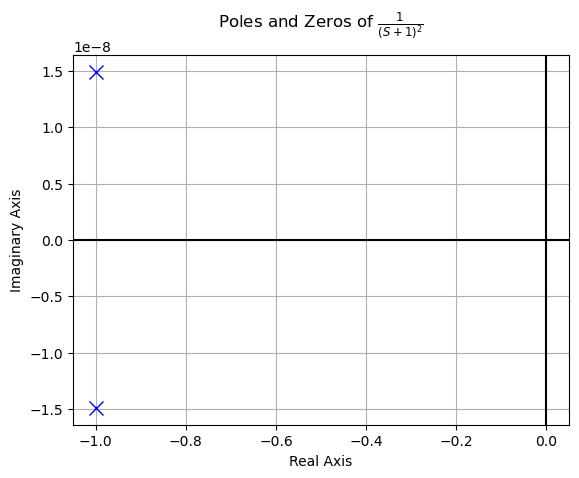

In [9]:
pole_zero_plot(TF1)

### Gráfica del diagrama de Bode de la función de transferencia

Mediante la función $bode_plot$ podemos obtener las gráficas de Bode de la función de transferencia:

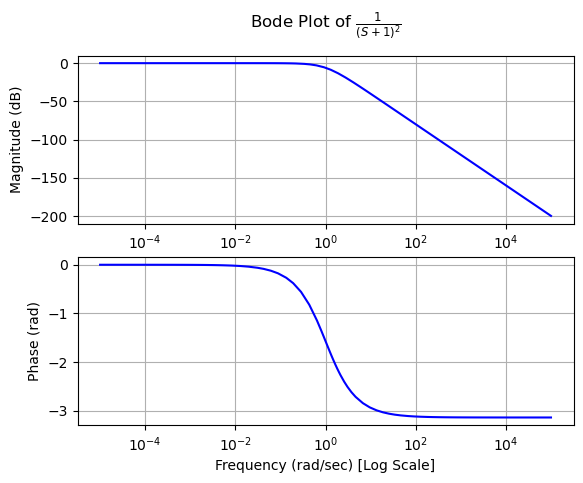

In [10]:
bode_plot(TF1)

## Gráfica del diagrama polar de la función de tranferencia

Para este caso vamos a utilizar la librería scipy 

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

In [13]:
numerador = TF1.num
numerador

1

In [14]:
#coeficientesNume=sp.Poly(numerador).all_coeffs()
numerador = 1

In [15]:
denominador = TF1.den
denominador

(S + 1)**2

In [16]:
coeficientesDen=sp.Poly(denominador).all_coeffs()
coeficientesDen

[1, 2, 1]

In [17]:
denominador = [float(x) for x in coeficientesDen]
#numerador = [float(x) for x in coeficientesNume]

In [18]:
sys =signal.TransferFunction(numerador, denominador)

In [19]:
w, h = signal.freqresp(sys)

### Graficar en el plano complejo

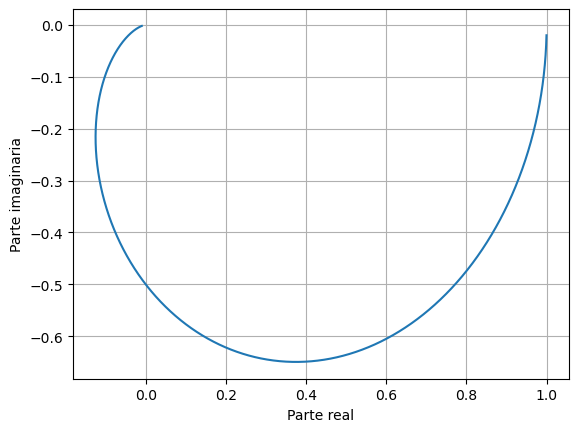

In [20]:
fig, ax = plt.subplots()
ax.plot(h.real, h.imag)
ax.set_xlabel('Parte real')
ax.set_ylabel('Parte imaginaria')
ax.grid(True)

plt.show()

También se puede graficar el diagrama de Bode con scipy

In [21]:
w, mag, phase = signal.bode(sys)

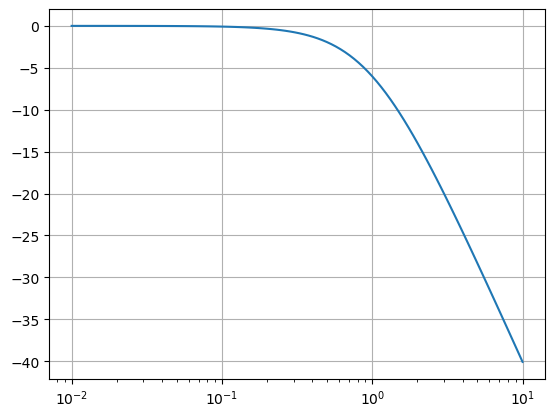

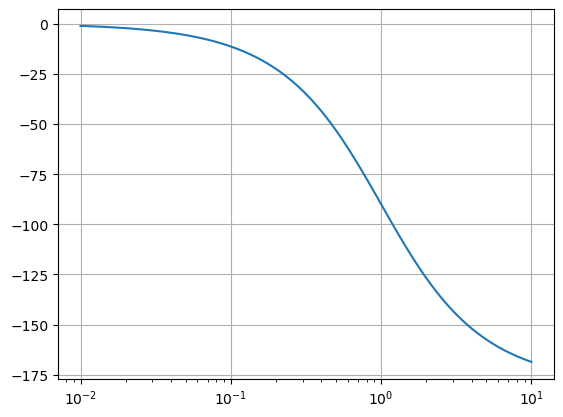

In [27]:
plt.figure()
plt.semilogx(w, mag)    # Bode magnitude plot
plt.grid(True)
plt.figure()
plt.semilogx(w, phase)  # Bode phase plot
plt.grid(True)
plt.show()
